In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글을 인식하게 해주는 코드

from matplotlib import font_manager,rc
import platform
import matplotlib

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기

In [3]:
test = pd.read_csv('./dataset/test.csv')
train = pd.read_csv('./dataset/train.csv')
age_gender = pd.read_csv('./dataset/age_gender_info.csv')

# 데이터 훑어보기

In [4]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [5]:
train.tail()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2951,C2532,239,아파트,강원도,국민임대,54.95,19,7.0,A,14830000,151030,0.0,1.0,166.0,146.0


In [6]:
train.shape

(2952, 15)

In [7]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [8]:
test.shape

(1022, 14)

In [9]:
age_gender.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [10]:
age_gender.shape

(16, 23)

In [11]:
train.info() # 임대보증금, 임대보증료,지하철, 버스정류장에 null값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [12]:
test.info() # 자격유형, 임대보증금, 임대료, 도보 10분거리 지하철역 수 null값이 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

# 중복데이터 제거 

In [13]:
train = train.drop_duplicates()

In [14]:
train.shape

(2632, 15)

# null값 처리

# train데이터의 null값 확인 

In [15]:
(train['임대보증금'].isnull()).sum()

292

In [16]:
(train['임대료'].isnull()).sum()

292

In [17]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

155

In [18]:
(train['도보 10분거리 내 버스정류장 수'].isnull()).sum()

4

In [19]:
train[train['공급유형']=='공공분양']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


## 임대보증금 처리 -> 평균값으로 대체

In [20]:
train[train['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0


In [21]:
# '-' 값을 NaN값으로 변환
train[train['임대보증금']=='-'] = train[train['임대보증금']=='-'].replace('-',np.NAN)

In [22]:
# 특성 파악을 위해 float형태로 변환
train['임대보증금'] = train['임대보증금'].astype(float)

In [23]:
# 변경됨을 확인
(train['임대보증금'].isnull()).sum()

304

In [24]:
# '임대보증금'의 특성 확인
train['임대보증금'].describe()

count    2.328000e+03
mean     2.682653e+07
std      2.171244e+07
min      3.056000e+06
25%      1.441800e+07
50%      2.080100e+07
75%      3.244300e+07
max      2.164230e+08
Name: 임대보증금, dtype: float64

In [25]:
# 평균값 확인
mean = train['임대보증금'].mean()
mean = np.round(mean)
mean

26826528.0

In [26]:
#NaN값을 평균값으로 변경
train['임대보증금'] = train['임대보증금'].fillna(mean)

In [27]:
# 변경됨을 확인
(train['임대보증금'].isnull()).sum()

0

## 임대료 처리 -> 평균으로 대체

In [28]:
train[train['임대료'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,26826528.0,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,26826528.0,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,26826528.0,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,26826528.0,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,26826528.0,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,26826528.0,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,26826528.0,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,26826528.0,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,26826528.0,NaN,0.0,8.0,664.0,744.0


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2632 non-null   object 
 1   총세대수                          2632 non-null   int64  
 2   임대건물구분                        2632 non-null   object 
 3   지역                            2632 non-null   object 
 4   공급유형                          2632 non-null   object 
 5   전용면적                          2632 non-null   float64
 6   전용면적별세대수                      2632 non-null   int64  
 7   공가수                           2632 non-null   float64
 8   자격유형                          2632 non-null   object 
 9   임대보증금                         2632 non-null   float64
 10  임대료                           2328 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2477 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2628 non-null   float64
 13  단지내

In [30]:
# '-' 값을 NaN값으로 변환
train[train['임대료']=='-'] = train[train['임대료']=='-'].replace('-',np.NAN)

# 특성 파악을 위해 float형태로 변환
train['임대료'] = train['임대료'].astype(float)

In [31]:
# 변경됨을 확인
train[train['임대료']=='-']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [32]:
train['임대료'].describe()

count    2.319000e+03
mean     1.955080e+05
std      1.307436e+05
min      1.665000e+04
25%      1.105500e+05
50%      1.610200e+05
75%      2.359800e+05
max      1.058030e+06
Name: 임대료, dtype: float64

In [33]:
# 평균값 확인
mean = train['임대료'].mean()
mean = np.round(mean)
mean

195508.0

In [34]:
#NaN값을 평균값으로 변경
train['임대료'] = train['임대료'].fillna(mean)

In [35]:
# 변경됨을 확인
(train['임대료'].isnull()).sum()

0

## 지하철 처리 -> 0으로 변경

In [36]:
train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000.0,122210.0,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000.0,122210.0,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000.0,130940.0,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000.0,149660.0,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000.0,69900.0,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,A,37474000.0,519350.0,NaN,6.0,1636.0,2315.0
2340,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,A,37385000.0,516130.0,NaN,6.0,1636.0,2315.0
2341,C1350,1401,아파트,대전광역시,공공임대(분납),51.99,146,2.0,A,54612000.0,131130.0,NaN,6.0,1636.0,2315.0
2342,C1350,1401,아파트,대전광역시,공공임대(분납),59.91,32,2.0,A,63585000.0,152680.0,NaN,6.0,1636.0,2315.0


In [37]:
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts() #최빈값이 0이기 때문에 0으로 처리

0.0    2130
1.0     308
2.0      33
3.0       6
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: int64

In [38]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

155

In [39]:
train[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].value_counts()

C1616    16
C1875    16
C2258    16
C1874    16
C1004    15
C1350    13
C2583    10
C1983     8
C2100     6
C1068     6
C2644     6
C1649     4
C1312     4
C1704     4
C1005     3
C2156     3
C1175     3
C1424     3
C2216     2
C2520     1
Name: 단지코드, dtype: int64

In [40]:
# 단지코드가 같을 때 지하철역수를 대입하려고 했는데 모두 NaN 이라 실패 ..
code = ['C1616','C1875','C2258','C1874','C1004','C1350','C2583','C1983','C2100','C1068','C2644','C1649','C1312','C1704','C1005',
        'C2156','C1175','C1424','C2216','C2520']
for i in code:
    print(train[train['단지코드'] == 'i']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'])

Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64)
Series([], Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: f

In [41]:
#NaN값을 0으로 변경
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

In [42]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

0

## 버스 처리 -> 0으로 변경

In [43]:
train[train['도보 10분거리 내 버스정류장 수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,0.0,NaN,1066.0,855.0


In [44]:
train['도보 10분거리 내 버스정류장 수'].value_counts() # 2값이 제일 많지만, 4건의 데이터이기때문에 0으로 처리

2.0     709
3.0     706
4.0     405
1.0     239
5.0     157
6.0     152
8.0      79
10.0     65
7.0      52
12.0     21
20.0     15
15.0     11
16.0      6
19.0      4
11.0      3
14.0      2
0.0       2
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [45]:
#NaN값을 0으로 변경
train['도보 10분거리 내 버스정류장 수'] = train['도보 10분거리 내 버스정류장 수'].fillna(0)

In [46]:
(train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

0

# test데이터의 null값 확인 

In [47]:
(test['자격유형'].isnull()).sum()

2

In [48]:
(test['임대보증금'].isnull()).sum()

180

In [49]:
(test['임대료'].isnull()).sum()

180

In [50]:
(test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

42

## 임대보증금 처리 -> 평균값으로

In [51]:
test[test['임대보증금'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0


In [52]:
test[test['임대보증금']=='-'] = test[test['임대보증금']=='-'].replace('-',np.NAN)
test['임대보증금'] = test['임대보증금'].astype(float)

In [53]:
# 평균값 확인
mean = test['임대보증금'].mean()
mean = np.round(mean)
mean

25050940.0

In [54]:
#NaN값을 평균값으로 변경
test['임대보증금'] = test['임대보증금'].fillna(mean)

In [55]:
# 변경됨을 확인
(test['임대보증금'].isnull()).sum()

0

## 임대료 처리 -> 평균값으로

In [56]:
test[test['임대료'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,25050940.0,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,25050940.0,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,25050940.0,NaN,2.0,5.0,428.0
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,25050940.0,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,25050940.0,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,C2152,120,아파트,강원도,영구임대,33.84,54,9.0,C,25050940.0,NaN,0.0,1.0,40.0
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,25050940.0,NaN,0.0,1.0,467.0
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,25050940.0,NaN,0.0,1.0,467.0
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,25050940.0,NaN,0.0,1.0,467.0


In [57]:
test[test['임대료']=='-'] = test[test['임대료']=='-'].replace('-',np.NAN)
test['임대료'] = test['임대료'].astype(float)

In [58]:
# 평균값 확인
mean = test['임대료'].mean()
mean = np.round(mean)
mean

177574.0

In [59]:
#NaN값을 평균값으로 변경
test['임대료'] = test['임대료'].fillna(mean)

In [60]:
# 변경됨을 확인
(test['임대료'].isnull()).sum()

0

# 자격유형 처리

In [61]:
test[test['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [62]:
test[test['단지코드']=='C2411'] # c2411'단지의 자격유형은 'A'

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [63]:
test[test['단지코드']=='C2253'] # 단지코드와 공급유형이 모두 같은 'c'값으로 선택

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0
259,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
260,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000.0,83020.0,0.0,2.0,173.0
261,C2253,1161,상가,강원도,임대상가,13.77,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
262,C2253,1161,상가,강원도,임대상가,22.89,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
263,C2253,1161,상가,강원도,임대상가,22.91,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
264,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
265,C2253,1161,상가,강원도,임대상가,23.79,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
266,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0
267,C2253,1161,상가,강원도,임대상가,23.86,1,0.0,D,25050940.0,177574.0,0.0,2.0,173.0


In [64]:
test.loc[(test.단지코드=='C2411')&test.자격유형.isnull(), '자격유형'] = 'A'
test.loc[(test.단지코드=='C2253')&test.자격유형.isnull(), '자격유형'] = 'C'

In [65]:
test[test['자격유형'].isnull()] # 변경됨을 확인

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수


## 지하철 처리 -> 0값으로 처리

In [66]:
test[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
68,C1472,548,아파트,충청남도,국민임대,36.62,116,2.0,A,8738000.0,87380.0,NaN,1.0,442.0
69,C1472,548,아파트,충청남도,국민임대,39.51,56,2.0,A,9985000.0,99850.0,NaN,1.0,442.0
70,C1472,548,아파트,충청남도,국민임대,46.79,56,2.0,A,13731000.0,131070.0,NaN,1.0,442.0
71,C1472,548,아파트,충청남도,국민임대,46.90,86,2.0,A,13731000.0,131070.0,NaN,1.0,442.0
72,C1472,548,아파트,충청남도,국민임대,51.93,234,2.0,A,18726000.0,143550.0,NaN,1.0,442.0
100,C1083,427,아파트,대전광역시,국민임대,39.85,40,0.0,A,12483000.0,106090.0,NaN,6.0,384.0
101,C1083,427,아파트,대전광역시,국민임대,51.48,64,0.0,A,32459000.0,187260.0,NaN,6.0,384.0
102,C1083,427,아파트,대전광역시,국민임대,51.99,107,0.0,A,32459000.0,187260.0,NaN,6.0,384.0
103,C1083,427,아파트,대전광역시,국민임대,51.99,96,0.0,A,32459000.0,187260.0,NaN,6.0,384.0
104,C1083,427,아파트,대전광역시,국민임대,59.45,120,0.0,A,39950000.0,243430.0,NaN,6.0,384.0


In [67]:
#NaN값을 0으로 변경
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0)

In [68]:
(test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()).sum()

0

# age_gender 데이터 이용 
 - 지역데이터를 수치적인 의미가 있는 데이터로 사용하기 위해 컬럼을 추가

In [69]:
# 20대 이상의 합만 구하기 위해 20대 미만 삭제
age_gender_20=age_gender.drop(['10대미만(여자)','10대미만(남자)','10대(여자)','10대(남자)'],axis=1)

In [70]:
age_gender['20대이상총합'] = age_gender_20.sum(axis=1)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_3788\701097438.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  age_gender['20대이상총합'] = age_gender_20.sum(axis=1)


In [71]:
age_gender.head() # 컬럼추가 확인

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),20대이상총합
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014,0.818941
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,0.836873
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066,0.859429
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.815928
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.823080


## train, test데이터에 join

In [72]:
#train데이터에 지역에 따른 20대 이상의 비율 추가
train = pd.merge(train,age_gender[['지역','20대이상총합']],how='left',left_on='지역',right_on='지역')

In [73]:
#test데이터에 지역에 따른 20대 이상의 비율 추가
test = pd.merge(test,age_gender[['지역','20대이상총합']],how='left',left_on='지역',right_on='지역')

# 삭제할 컬럼 확인

In [74]:
corr = train.corr()
corr

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,20대이상총합
총세대수,1.000000,0.067498,0.168208,0.103241,0.065102,0.083760,0.131384,0.038483,0.598347,0.423656,0.296112
전용면적,0.067498,1.000000,-0.071887,-0.116087,0.187270,0.280833,-0.000607,-0.007341,0.035756,0.081118,0.085081
전용면적별세대수,0.168208,-0.071887,1.000000,0.151090,-0.093708,-0.053941,-0.024246,0.054413,0.231223,0.188906,0.027242
공가수,0.103241,-0.116087,0.151090,1.000000,0.030570,-0.178381,-0.110199,0.050872,0.292526,0.095454,-0.038823
임대보증금,0.065102,0.187270,-0.093708,0.030570,1.000000,0.491838,0.028010,0.101451,0.251715,0.283975,0.213541
임대료,0.083760,0.280833,-0.053941,-0.178381,0.491838,1.000000,0.069404,0.036539,0.255493,0.373893,0.167341
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.131384,-0.000607,-0.024246,-0.110199,0.028010,0.069404,1.000000,0.106098,-0.028426,-0.063716,0.319448
도보 10분거리 내 버스정류장 수,0.038483,-0.007341,0.054413,0.050872,0.101451,0.036539,0.106098,1.000000,0.093102,0.117849,-0.044671
단지내주차면수,0.598347,0.035756,0.231223,0.292526,0.251715,0.255493,-0.028426,0.093102,1.000000,0.851280,0.019532
등록차량수,0.423656,0.081118,0.188906,0.095454,0.283975,0.373893,-0.063716,0.117849,0.851280,1.000000,-0.032255


<AxesSubplot:>

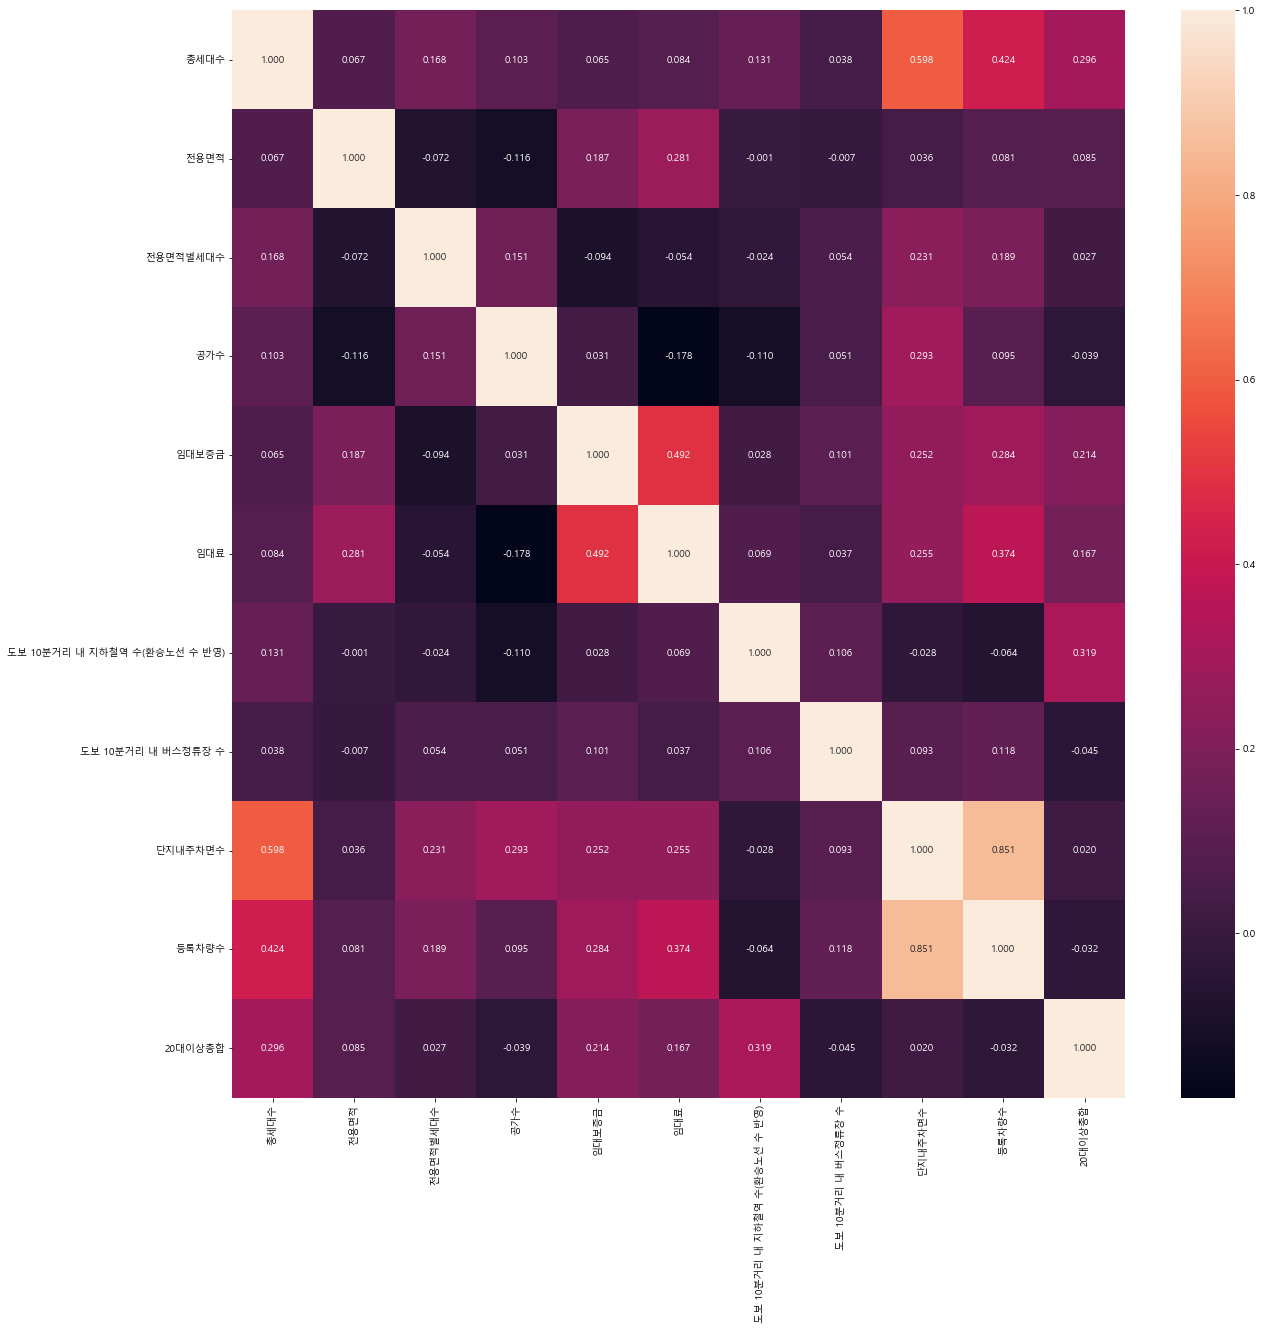

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.3f')

In [76]:
train.corr()['등록차량수'].sort_values() 

도보 10분거리 내 지하철역 수(환승노선 수 반영)   -0.063716
20대이상총합                        -0.032255
전용면적                            0.081118
공가수                             0.095454
도보 10분거리 내 버스정류장 수              0.117849
전용면적별세대수                        0.188906
임대보증금                           0.283975
임대료                             0.373893
총세대수                            0.423656
단지내주차면수                         0.851280
등록차량수                           1.000000
Name: 등록차량수, dtype: float64

In [77]:
# '단지내주차면수' 가 등록차량수와 가장 높은 상관관계가 있어서 이와 관련성이 높은 값 확인
train.corr()['단지내주차면수'].sort_values()

도보 10분거리 내 지하철역 수(환승노선 수 반영)   -0.028426
20대이상총합                         0.019532
전용면적                            0.035756
도보 10분거리 내 버스정류장 수              0.093102
전용면적별세대수                        0.231223
임대보증금                           0.251715
임대료                             0.255493
공가수                             0.292526
총세대수                            0.598347
등록차량수                           0.851280
단지내주차면수                         1.000000
Name: 단지내주차면수, dtype: float64

In [78]:
#삭제 - 지역(20대이상의비율과 같음), 공급유형(임대건물구분의 하위데이터), 
#       공가수(상관관계 매우작음), 자격유형(차량에대한 규제는 금액적인 부분만 들어감)

In [79]:
train = train.drop(['지역','공급유형','공가수','자격유형'],axis=1)

In [80]:
test = test.drop(['지역','공급유형','공가수','자격유형'],axis=1)

# 임대건물구분을 숫자데이터로 변환 
- 아파트 : 0, 상가:1 로 변환

In [81]:
# 아파트는 0, 상가는 1 로 변환
train['임대건물구분'] = train['임대건물구분'].map({'아파트':0, '상가':1})
test['임대건물구분'] = test['임대건물구분'].map({'아파트':0, '상가':1})

In [82]:
train

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,20대이상총합
0,C2483,900,0,39.72,134,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0.818941
1,C2483,900,0,39.72,15,15667000.0,103680.0,0.0,3.0,1425.0,1015.0,0.818941
2,C2483,900,0,51.93,385,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0.818941
3,C2483,900,0,51.93,15,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0.818941
4,C2483,900,0,51.93,41,27304000.0,184330.0,0.0,3.0,1425.0,1015.0,0.818941
...,...,...,...,...,...,...,...,...,...,...,...,...
2627,C2532,239,0,49.20,19,11346000.0,116090.0,0.0,1.0,166.0,146.0,0.836432
2628,C2532,239,0,51.08,34,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.836432
2629,C2532,239,0,51.73,34,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.836432
2630,C2532,239,0,51.96,114,14005000.0,142310.0,0.0,1.0,166.0,146.0,0.836432


In [83]:
test

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
0,C1072,754,0,39.79,116,22830000.0,189840.0,0.0,2.0,683.0,0.815928
1,C1072,754,0,46.81,30,36048000.0,249930.0,0.0,2.0,683.0,0.815928
2,C1072,754,0,46.90,112,36048000.0,249930.0,0.0,2.0,683.0,0.815928
3,C1072,754,0,46.90,120,36048000.0,249930.0,0.0,2.0,683.0,0.815928
4,C1072,754,0,51.46,60,43497000.0,296780.0,0.0,2.0,683.0,0.815928
...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,0,36.77,126,25050940.0,177574.0,0.0,1.0,467.0,0.836873
1018,C2189,382,0,29.19,96,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1019,C2189,382,0,29.19,20,6872000.0,106400.0,0.0,2.0,300.0,0.823080
1020,C2189,382,0,39.45,202,13410000.0,144600.0,0.0,2.0,300.0,0.823080


# x,y값 나누기

In [84]:
x_train = train.drop(['등록차량수'],axis=1)
y_train = train['등록차량수']

# 데이터 시각화

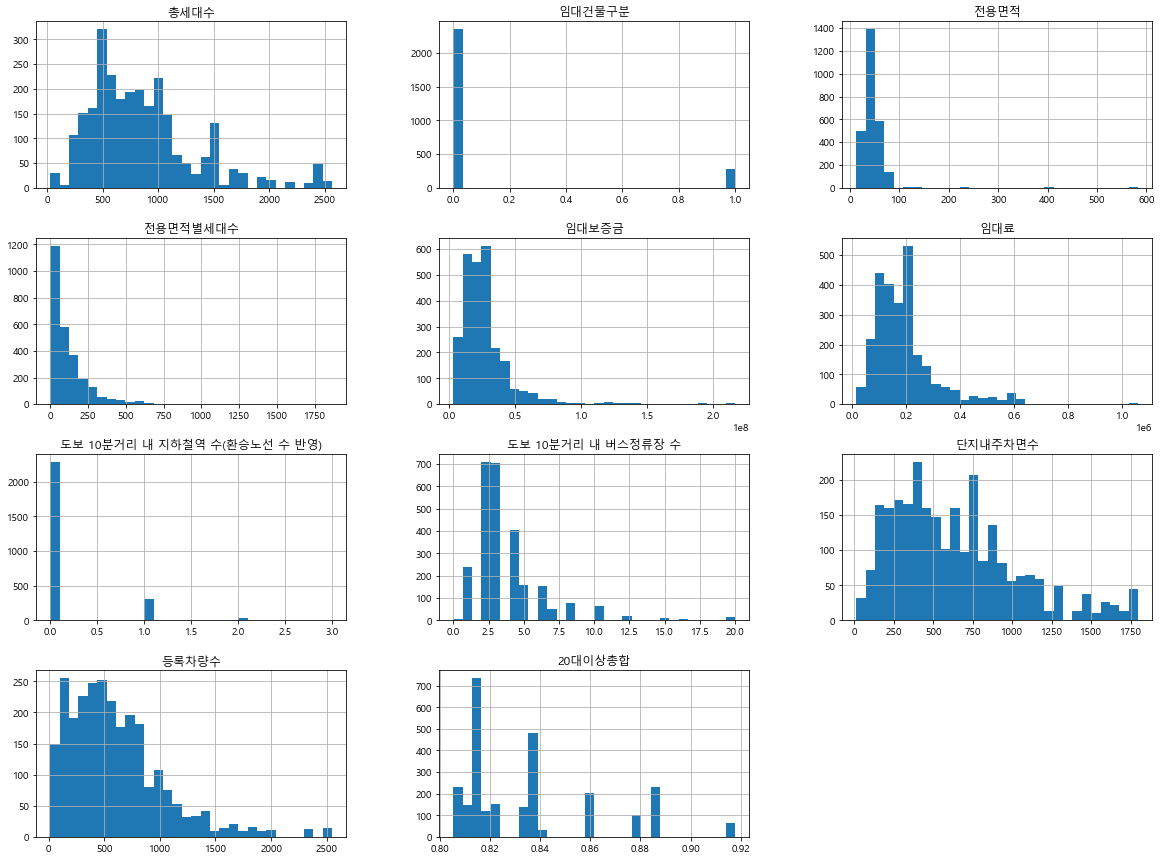

In [85]:
# 히스토그램
h = train.hist(bins=30,figsize=(20,15))

[Text(0.5, 1.0, '단지내주차면수')]

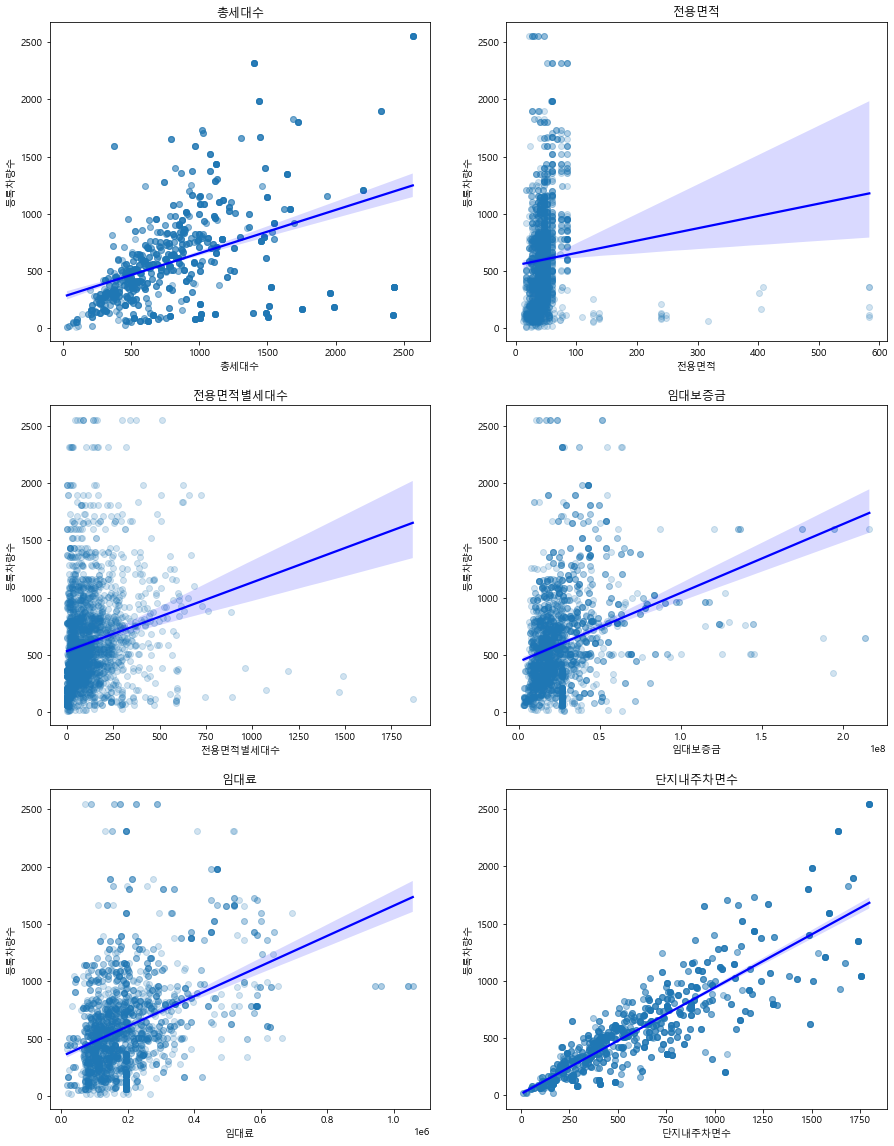

In [86]:
# 산점도(연속형데이터)

figure, axes = plt.subplots(3,2)
figure.set_size_inches(15, 20)

sns.regplot(data=train, x='총세대수', y='등록차량수', ax=axes[0][0],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='전용면적', y='등록차량수', ax=axes[0][1],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='전용면적별세대수', y='등록차량수', ax=axes[1][0],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='임대보증금', y='등록차량수', ax=axes[1][1],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='임대료', y='등록차량수', ax=axes[2][0],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})
sns.regplot(data=train, x='단지내주차면수', y='등록차량수', ax=axes[2][1],
           scatter_kws={'alpha':0.2}, line_kws={'color' : 'blue'})

axes[0][0].set(title='총세대수')
axes[0][1].set(title='전용면적')
axes[1][0].set(title='전용면적별세대수')
axes[1][1].set(title='임대보증금')
axes[2][0].set(title='임대료')
axes[2][1].set(title='단지내주차면수')

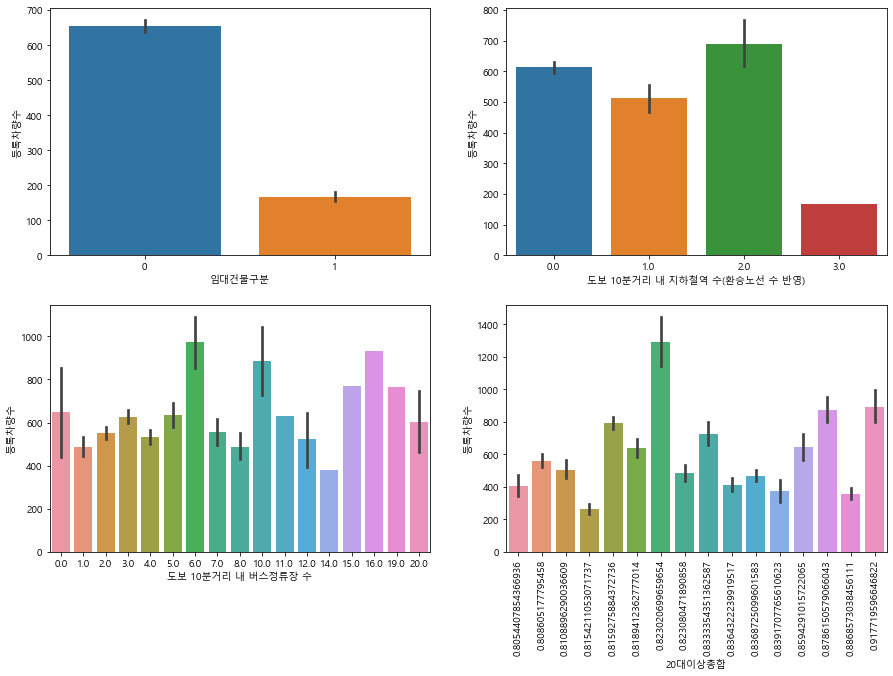

In [87]:
# bar그래프(범주형데이터)
figure, axes = plt.subplots(2,2)
figure.set_size_inches(15, 10)

sns.barplot(data=train, x='임대건물구분', y='등록차량수',ax=axes[0][0])
sns.barplot(data=train, x='도보 10분거리 내 지하철역 수(환승노선 수 반영)', y='등록차량수',ax=axes[0][1])
sns.barplot(data=train, x='도보 10분거리 내 버스정류장 수', y='등록차량수',ax=axes[1][0])
sns.barplot(data=train, x='20대이상총합', y='등록차량수',ax=axes[1][1])

axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=90)

plt.show()

In [88]:
test[test['도보 10분거리 내 버스정류장 수'] == 50]

,단지코드,총세대수,임대건물구분,전용면적,전용면적별세대수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,20대이상총합
383,C1852,898,0,39.59,219,23720000.0,197230.0,0.0,50.0,785.0,0.815928
384,C1852,898,0,39.72,56,23720000.0,197230.0,0.0,50.0,785.0,0.815928
385,C1852,898,0,39.72,44,23720000.0,197230.0,0.0,50.0,785.0,0.815928
386,C1852,898,0,46.90,46,37454000.0,259660.0,0.0,50.0,785.0,0.815928
387,C1852,898,0,46.90,22,37454000.0,259660.0,0.0,50.0,785.0,0.815928
388,C1852,898,0,46.90,225,37454000.0,259660.0,0.0,50.0,785.0,0.815928
389,C1852,898,0,51.93,136,45193000.0,308350.0,0.0,50.0,785.0,0.815928
390,C1852,898,0,51.93,44,45193000.0,308350.0,0.0,50.0,785.0,0.815928
391,C1852,898,0,59.61,106,61674000.0,370790.0,0.0,50.0,785.0,0.815928


<AxesSubplot:>

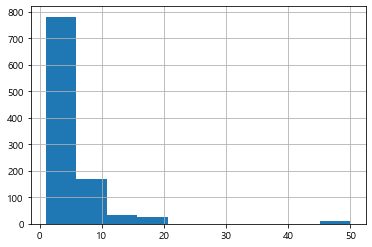

In [89]:
test['도보 10분거리 내 버스정류장 수'].hist()

# 베이스라인 모델 

In [90]:
#선형회기, 경사하강, 다항회귀, 규제모델 회귀트리, 앙상블(배깅,부스팅,랜덤포레스트), 서포트벡터

In [91]:
# 단지코드값이 문자열데이터이기 때문에 이를 제외하고 실시
x_train2 = x_train.drop(['단지코드'],axis=1)

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [104]:
from sklearn.metrics import mean_absolute_error

## 선형회귀( LinearRegression) --> 166.69

In [93]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train2,y_train,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

166.69130119351706

## 선형회귀( kford)

In [106]:
from sklearn.model_selection import KFold

mae_lis = []

lin_reg = LinearRegression()

kfold = KFold(n_splits=5)
for train_index, valid_index in kfold.split(x_train2):
    # 훈련(학습)
    x_train_2, y_train_2 = x_train2.iloc[train_index], y_train.iloc[train_index] # 4/5
    x_valid, y_valid = x_train2.iloc[valid_index], y_train.iloc[valid_index] # 1/5
    lin_reg.fit(x_train_2, y_train_2)
  
  
    # 예측과 평가(정확도)
    pred = lin_reg.predict(x_valid)
    mae = mean_absolute_error(y_valid, pred)
    mae_lis.append(mae)

print("평균 mae: ", np.mean(mae_lis))

평균 mae:  166.69130119351706


## SGDRegressor -->168.05

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(penalty='None', random_state=42)

# 정규화
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train2)

scores = cross_val_score(sgd_reg, x_train_scaled, y_train, scoring="neg_mean_absolute_error", cv=5)
np.mean(-scores)

## 다항회귀(LinearRegression) -->316.14

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 2 , include_bias = False)
x_train_poly = poly_feature.fit_transform(x_train2)


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
score = cross_val_score(lin_reg,x_train_poly,y_train,cv=5,scoring='neg_mean_absolute_error')
np.mean(-score)

## 다항회귀(SGD) --> 201.68

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 2, include_bias = False)
x_train_poly = poly_feature.fit_transform(x_train2)

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='None', random_state=42)

# (2) STD Scale (표준화)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_train_poly_scaled = std_scaler.fit_transform(x_train_poly)

scores = cross_val_score(sgd_reg, x_train_poly_scaled, y_train, scoring="neg_mean_absolute_error", cv=5)
np.mean(-scores)

## 랜덤포레스트 --> 167.84

In [ ]:
from sklearn.ensemble import RandomForestRegressor
f_params = [{'n_estimators':[50,70,100,130,150]}
            ,{'n_estimators':[50,70,100,130,150],'max_depth':[3,5,7,10,30,50]},
           {'max_depth':[3,5,7,10,30,50]}]

forest = RandomForestRegressor(random_state=42)

gridsearch_forest = GridSearchCV(forest,f_params,scoring='neg_mean_absolute_error'
                                 ,cv= 5,n_jobs=-1)
gridsearch_forest.fit(x_train2,y_train)

In [ ]:
cvres = gridsearch_forest.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) # rmsle와 그 때의 하이퍼 파라미터

In [ ]:
gridsearch_forest.best_params_ 

In [ ]:
best_model = gridsearch_forest.best_estimator_

In [ ]:
x_train.shape